# WOMart Supplement Sales Prediction

In [1]:
#Import required packages

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading train data
df1=pd.read_csv('TRAIN.csv') #loading the train set
df2=pd.read_csv('TEST_FINAL.csv')  #loading the test set

In [3]:
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
# Checking Null values in Train Set
df1.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
# Checking Null values in Test Set
df2.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

Store_Type:
 S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64


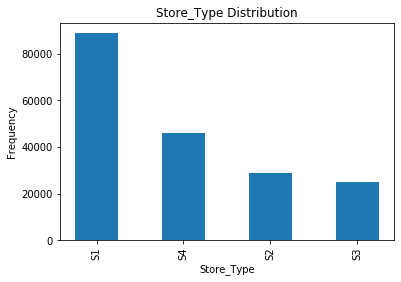

In [6]:
df1['Store_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Store_Type'].value_counts().index, df1['Store_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Store_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Store_Type')
plt.ylabel('Frequency')
print('Store_Type:\n',df1['Store_Type'].value_counts())

Location_Type:
 L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64


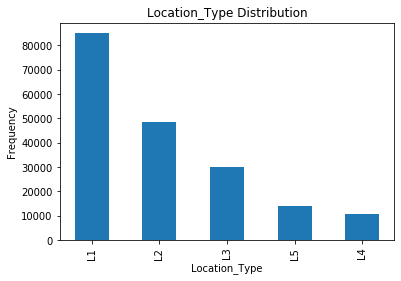

In [7]:
df1['Location_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Location_Type'].value_counts().index, df1['Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Location_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Location_Type')
plt.ylabel('Frequency')
print('Location_Type:\n',df1['Location_Type'].value_counts())

In [8]:
df2.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [9]:
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [10]:
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [11]:
df1.drop(['Date','#Order'],axis=1,inplace=True)

In [12]:
df2.drop(['Date'],axis=1,inplace=True)

In [13]:
# One hot encoding the categorical variables in both train and test set
Store_Type=pd.get_dummies(df1['Store_Type'])
Location_Type=pd.get_dummies(df1['Location_Type'])
Region_Code=pd.get_dummies(df1['Region_Code'])
#month=pd.get_dummies(df1['month'])
Discount=pd.get_dummies(df1['Discount'])

Store_Type_test=pd.get_dummies(df2['Store_Type'])
Location_Type_test=pd.get_dummies(df2['Location_Type'])
Region_Code_test=pd.get_dummies(df2['Region_Code'])
#month_test=pd.get_dummies(df2['month'])
Discount_test=pd.get_dummies(df2['Discount'])

In [14]:
train = df1
train=pd.concat([train,Store_Type,Location_Type,Region_Code,Discount],axis=1)
train.drop(['ID','Store_id','Store_Type','Location_Type','Region_Code','Discount'],axis=1,inplace=True)
test=df2
test=pd.concat([test,Store_Type_test,Location_Type_test,Region_Code_test,Discount_test],axis=1)
test.drop(['ID','Store_id','Store_Type','Location_Type','Region_Code','Discount'],axis=1,inplace=True)

In [15]:
train.isnull().sum()

Holiday    0
Sales      0
S1         0
S2         0
S3         0
S4         0
L1         0
L2         0
L3         0
L4         0
L5         0
R1         0
R2         0
R3         0
R4         0
No         0
Yes        0
dtype: int64

In [16]:
test.isnull().sum()

Holiday    0
S1         0
S2         0
S3         0
S4         0
L1         0
L2         0
L3         0
L4         0
L5         0
R1         0
R2         0
R3         0
R4         0
No         0
Yes        0
dtype: int64

# Scaling the variables/optional

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Sales']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [19]:
train.head()

,Holiday,Sales,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,1,7011.84,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,1,51789.12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,1,36868.20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,1,19715.16,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,45614.52,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [20]:
x=train.drop(['Sales'],axis=1)
y=train['Sales']
x_test=test

In [21]:
x_test.head()

,Holiday,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [22]:
x_test.isnull().sum()

Holiday    0
S1         0
S2         0
S3         0
S4         0
L1         0
L2         0
L3         0
L4         0
L5         0
R1         0
R2         0
R3         0
R4         0
No         0
Yes        0
dtype: int64

In [23]:
x_test.dtypes

Holiday    int64
S1         uint8
S2         uint8
S3         uint8
S4         uint8
L1         uint8
L2         uint8
L3         uint8
L4         uint8
L5         uint8
R1         uint8
R2         uint8
R3         uint8
R4         uint8
No         uint8
Yes        uint8
dtype: object

x_test=pd.concat([x_test,data_id_2],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [25]:
from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error as mse
#from sklearn.metrics import mean_absolute_error, mean_squared_error

# Building models & comparing RMSE Values

### 1.Linear Regression

In [26]:
## Methood 1..
clf1 = LinearRegression()
clf1.fit(x_train, y_train)
y_pred_linear=clf1.predict(x_val)
acc_linear=round( clf1.score(x_train, y_train) * 100, 2)
print ('scorbe:'+str(acc_linear) + ' percent')

scorbe:54.9 percent


# RMSE

In [27]:
MSE= metrics.mean_squared_error(y_val,y_pred_linear)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 12321.5086805784


### 2. Random Forest

In [28]:
clf2 = RandomForestRegressor(n_estimators=100)
clf2.fit(x_train, y_train)
y_pred_rf=clf2.predict(x_val)
acc_rf= round(clf2.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 56 % 



In [29]:
MSE= metrics.mean_squared_error(y_val,y_pred_rf)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 12012.550674379618


### 3. Decision Tree

In [30]:
clf3=DecisionTreeRegressor()
clf3.fit(x_train, y_train)
y_pred_dt= clf3.predict(x_val)
acc_dt = round( clf3.score(x_train, y_train) * 100, 2)
print (str(acc_dt) + ' percent')

56.95 percent


In [31]:
MSE= metrics.mean_squared_error(y_val,y_pred_dt)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 12012.20854028932


# Comparing Models

In [32]:

models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,56.95
2,Decision Tree,56.95
0,Linear Regression,54.90


In [33]:
len(x_test)

22265

In [34]:
len(y_pred_dt)

18834

# Predicting Sales value for test data based on highest score model.

In [35]:
submission = pd.read_csv('my_submission_v1.csv')
final_pred=clf1.predict(x_test)
submission['Predicted_Sales'] = final_pred

In [36]:
submission.to_csv('Predicted Sales.csv', index=False)

In [37]:
submission.head()

,ID,Predicted_Sales
0,T1188341,58291.0
1,T1188342,35200.5
2,T1188343,59312.0
3,T1188344,33899.0
4,T1188345,34424.5


In [38]:
#Scaling is not applied to this prediction, Solution has been taken without scaling of the variable Sales